In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# New Section

## Loading audio files with Librosa

In [2]:
iox = "iox.wav"
iox_with_babble_noise = "iox_with_babble_noise.wav"
iox_with_music_noise = "iox_with_music_noise.wav"
iox_with_phone_noise = "iox_with_phone_noise.wav"
ph="phone.wav"


In [3]:
ipd.Audio(iox)

In [4]:
ipd.Audio(iox_with_babble_noise)

In [5]:
ipd.Audio(iox_with_music_noise)

In [6]:
ipd.Audio(iox_with_phone_noise)

In [7]:
# load audio files with librosa

ioxb, _ = librosa.load(iox_with_babble_noise)
ioxm, _ = librosa.load(iox_with_music_noise)
ioxp, _ = librosa.load(iox_with_phone_noise)

In [8]:
ioxs, sr = librosa.load(iox)
ab,sr=librosa.load(ph)

In [9]:
sr

22050

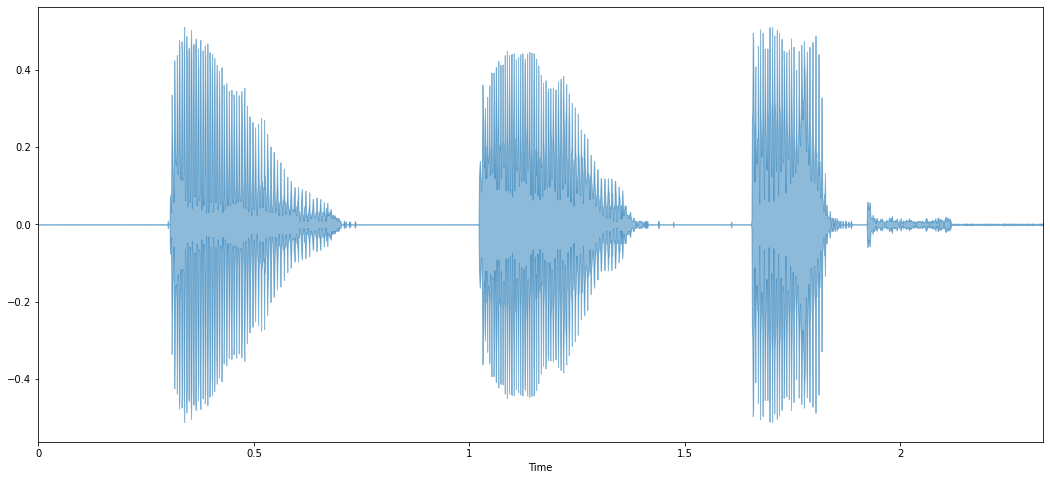

In [10]:
plt.figure(figsize=(18, 8))
librosa.display.waveplot(y=ioxs, sr=sr, alpha=0.5)
plt.show()

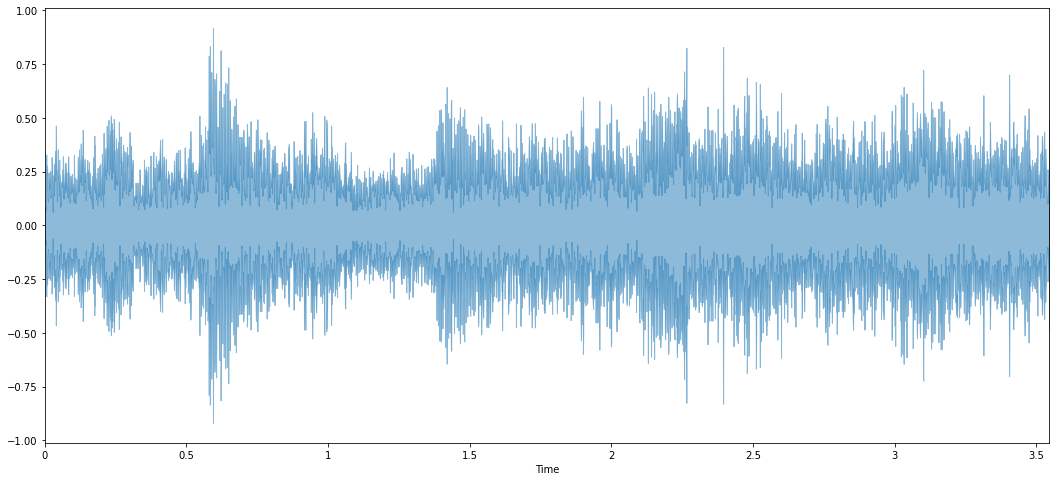

In [11]:
plt.figure(figsize=(18, 8))
librosa.display.waveplot(y=ioxb, sr=sr, alpha=0.5)
plt.show()

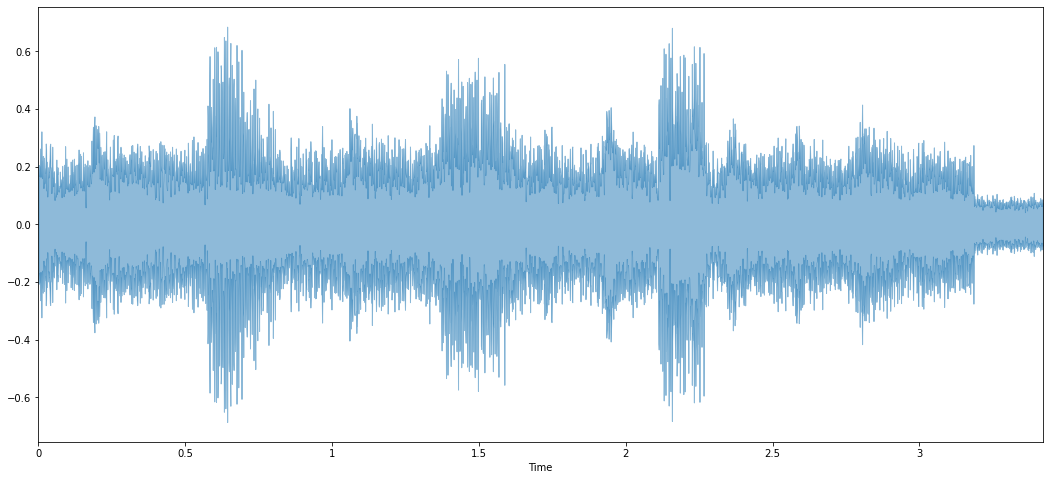

In [12]:
plt.figure(figsize=(18, 8))
librosa.display.waveplot(y=ioxm, sr=sr, alpha=0.5)
plt.show()

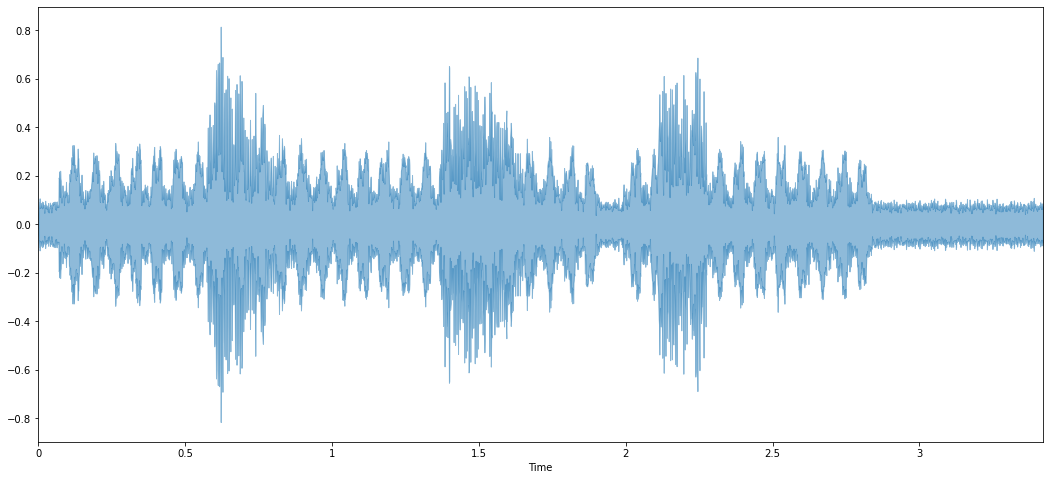

In [13]:
plt.figure(figsize=(18, 8))
librosa.display.waveplot(y=ioxp, sr=sr, alpha=0.5)
plt.show()

# Fast Fourier transform

In [14]:
ft = sp.fft.fft(ioxs)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

In [15]:
ft2 = sp.fft.fft(ioxb)
magnitude2 = np.absolute(ft2)
frequency2 = np.linspace(0, sr, len(magnitude2))

In [16]:
ft3 = sp.fft.fft(ioxm)
magnitude3 = np.absolute(ft3)
frequency3 = np.linspace(0, sr, len(magnitude3))

In [17]:
ft4 = sp.fft.fft(ioxp)
magnitude4 = np.absolute(ft4)
frequency4 = np.linspace(0, sr, len(magnitude4))

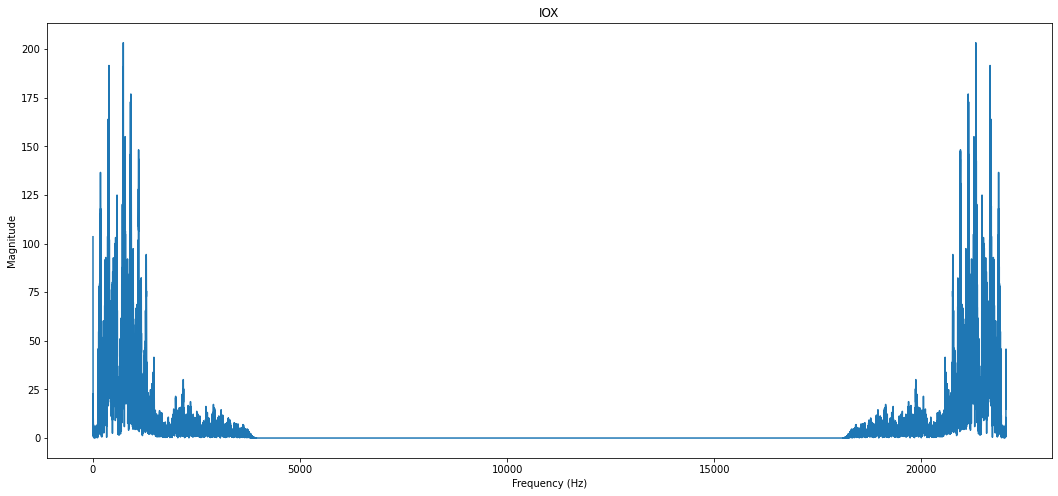

In [18]:
plt.figure(figsize=(18, 8))
plt.plot(frequency, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("IOX")
plt.show()

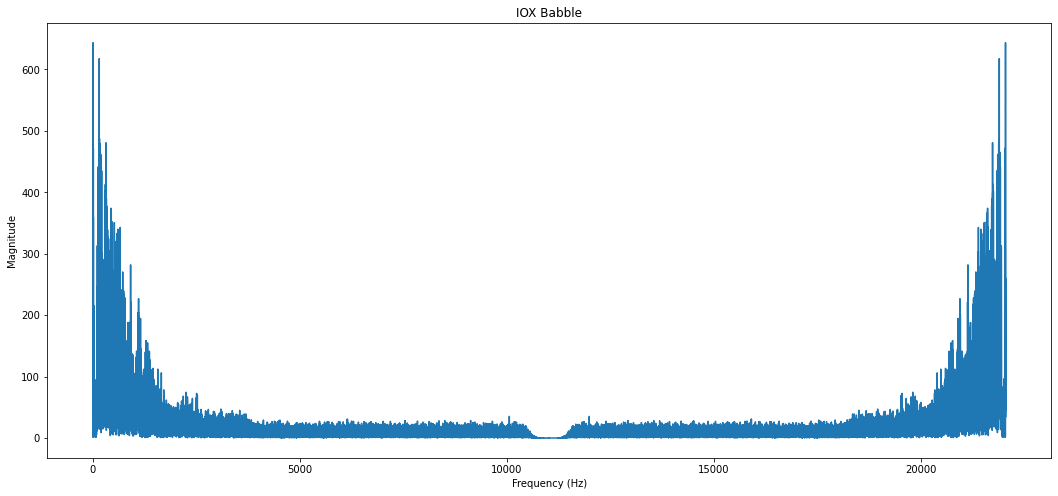

In [19]:
plt.figure(figsize=(18, 8))
plt.plot(frequency2, magnitude2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("IOX Babble")
plt.show()

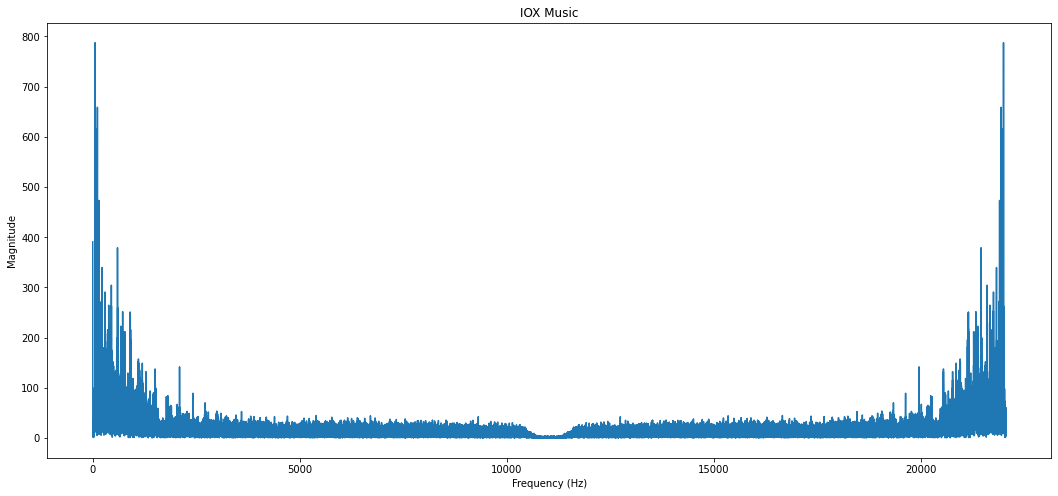

In [20]:
plt.figure(figsize=(18, 8))
plt.plot(frequency3, magnitude3)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("IOX Music")
plt.show()

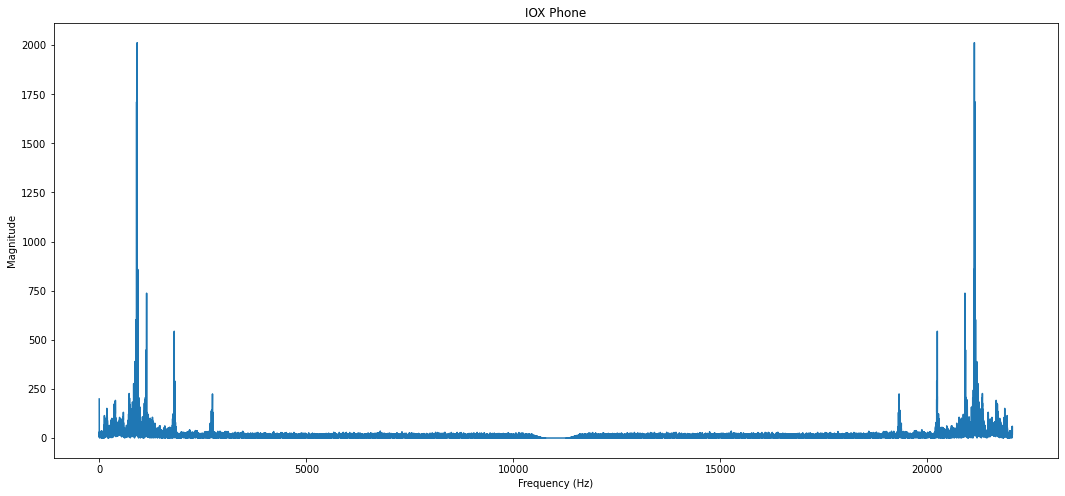

In [21]:
plt.figure(figsize=(18, 8))
plt.plot(frequency4, magnitude4)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("IOX Phone")
plt.show()

**phase(theta)= argmax E[0,1) (integration(s(t)*sin(2*pi-(ft-theta)) **

> Indented block



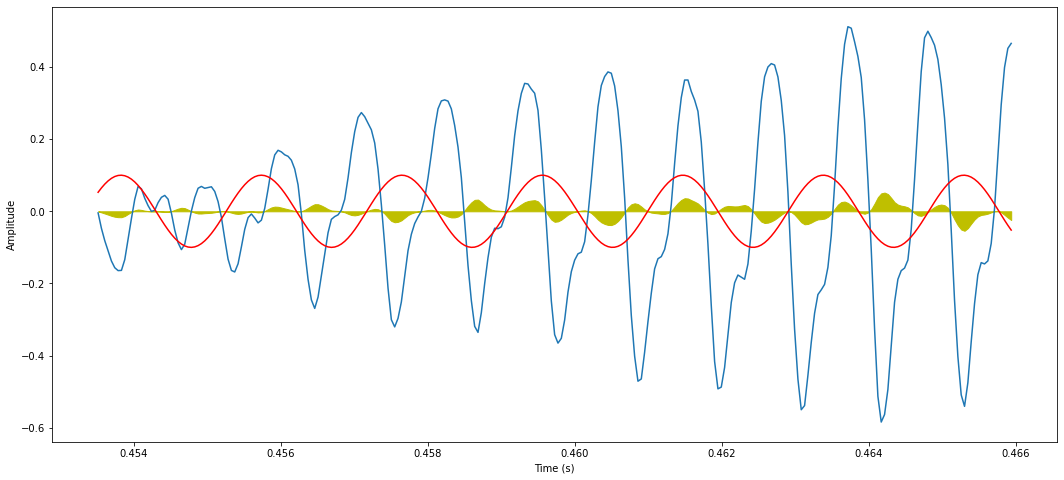

In [22]:
samples = range(len(ab))
t = librosa.samples_to_time(samples, sr=sr)
f = 523
phase = 0.10

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10275], ab[10000:10275]) 
plt.plot(t[10000:10275], sin[10000:10275], color="r")

plt.fill_between(t[10000:10275], sin[10000:10275]*ab[10000:10275], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

## Extracting Short-Time Fourier Transform

In [24]:
S_iox = librosa.stft(ioxs, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_ioxb = librosa.stft(ioxb, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_ioxm = librosa.stft(ioxm, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_ioxp = librosa.stft(ioxp, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

## Calculating the spectrogram

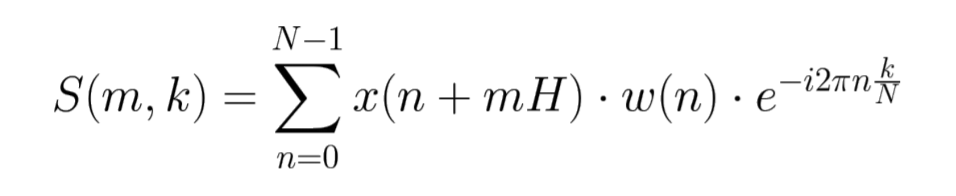

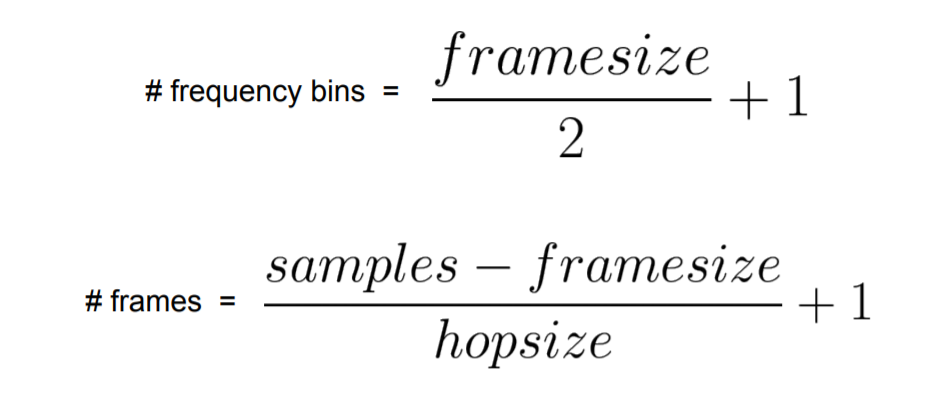

In [25]:
Y_iox = np.abs(S_iox) ** 2
Y_ioxb = np.abs(S_ioxb) ** 2
Y_ioxm = np.abs(S_ioxm) ** 2
Y_ioxp = np.abs(S_ioxp) ** 2

## Visualizing the spectrogram

In [26]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(10, 7))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

# Spectrograms

In [87]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [88]:
S_iox.shape

(1025, 101)

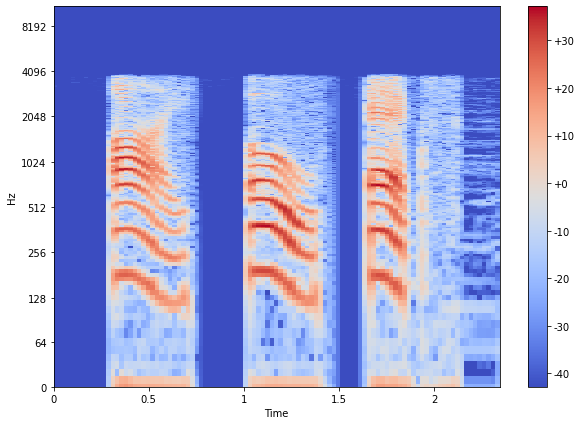

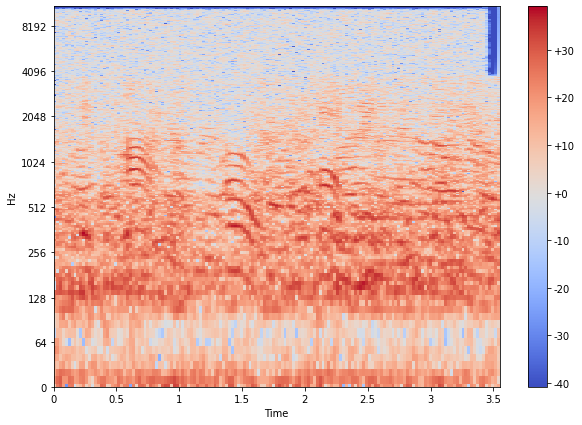

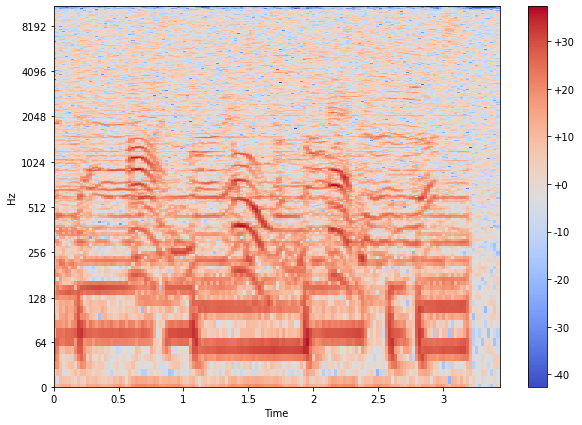

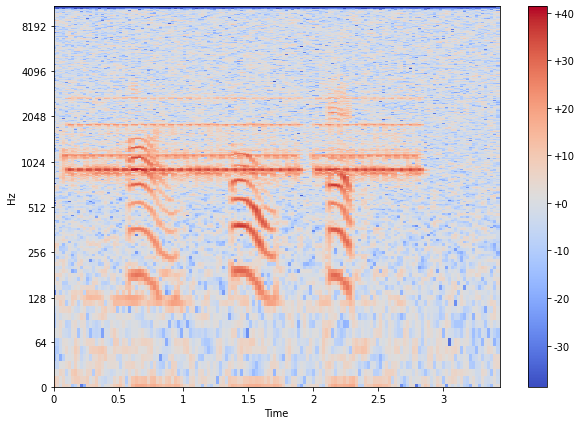

In [27]:
#extracting stft
S_iox = librosa.stft(ioxs, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_ioxb = librosa.stft(ioxb, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_ioxm = librosa.stft(ioxm, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_ioxp = librosa.stft(ioxp, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

#log amplitude
Y_iox = librosa.power_to_db(np.abs(S_iox) ** 2)
Y_ioxb = librosa.power_to_db(np.abs(S_ioxb) ** 2)
Y_ioxm = librosa.power_to_db(np.abs(S_ioxm) ** 2)
Y_ioxp = librosa.power_to_db(np.abs(S_ioxp) ** 2)

#log frequency
plot_spectrogram(Y_iox, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_ioxb, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_ioxm, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_ioxp, sr, HOP_SIZE, y_axis="log")

# Automate

In [28]:
pip install pydub

In [29]:
import IPython.display as ipd

In [30]:
from pydub import AudioSegment

sound1 = AudioSegment.from_wav("iox.wav")
sound2 = AudioSegment.from_wav("iox_with_babble_noise.wav")

combined_sounds = sound1 + sound2
combined_sounds.export("path.wav", format="wav")

<_io.BufferedRandom name='path.wav'>

In [70]:
def create(letter1,letter2,letter3,noise1,noise2, silence, wnoise):
  word = letter1 + silence + letter2 + silence + letter3 + silence

  noise1 = noise1 
  noise2 = noise2
  wnoise = wnoise - 25
  com1 = word.overlay(noise1)
  com2 = com1.overlay(noise2)
  com3 = com2.overlay(wnoise)

  com3.export("export3.wav", format="wav")

In [71]:
from pydub import AudioSegment

letter1 = AudioSegment.from_wav("M.wav")
letter2 = AudioSegment.from_wav("T.wav")
letter3 = AudioSegment.from_wav("L.wav")
noise1 = AudioSegment.from_file("gan1.wav")
noise2 = AudioSegment.from_file("gan2.wav")
whitenoise = AudioSegment.from_file("whitenoise.wav")
silence = AudioSegment.from_file("silence.wav")
sine = AudioSegment.from_file("sine.wav")

create(letter1, letter2, letter3, noise1, noise2, silence, whitenoise)

In [90]:
sample = "gan_bells_noise2.wav"
ipd.Audio(sample)

# Recognizer

In [34]:
pip install speechrecognition

     |████████████████████████████████| 32.8MB 1.5MB/s 


In [35]:
import speech_recognition as sr

In [36]:
r = sr.Recognizer()

In [76]:
audio = sr.AudioFile("new_nums_phone.wav")
with audio as source:
    text = r.record(source)
r.recognize_google(text,show_all=True)

{'alternative': [{'confidence': 0.92400587, 'transcript': '805'},
  {'transcript': '8:05'}],
 'final': True}

# Spectrogram

In [38]:
def plot(audio_sample) :
  audio1, sr = librosa.load(audio_sample)
  S_audio = librosa.stft(audio1, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
  Y_audio = librosa.power_to_db(np.abs(S_audio) ** 2)
  plot_spectrogram(Y_audio, sr, HOP_SIZE, y_axis="log")

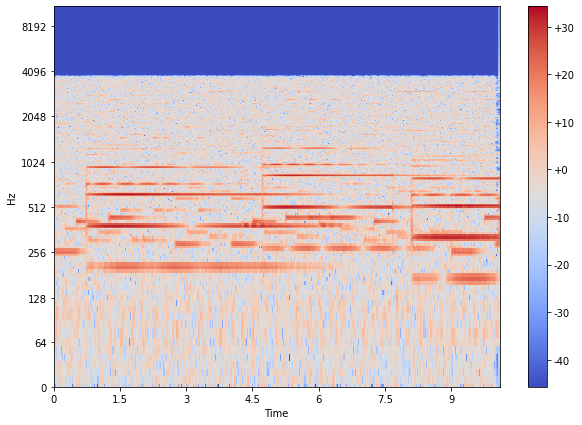

In [78]:
audio2 = "gan_bells_noise2.wav"
plot(audio2)

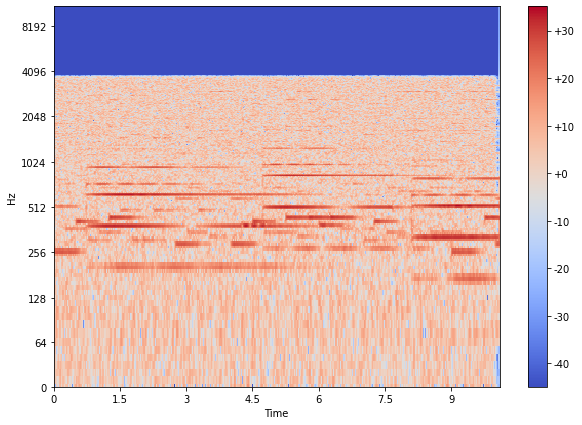

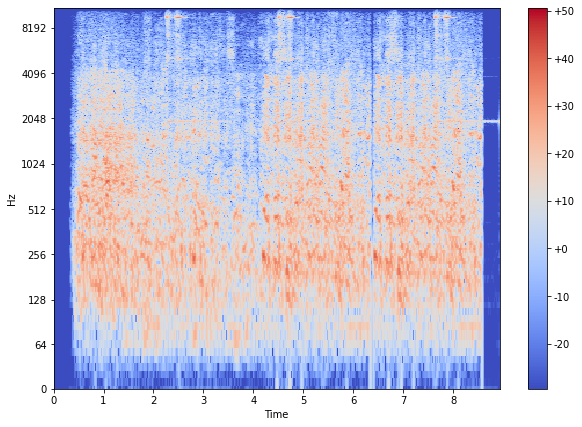

In [40]:
audio3 = "BicycleBell.wav"
plot(audio3)

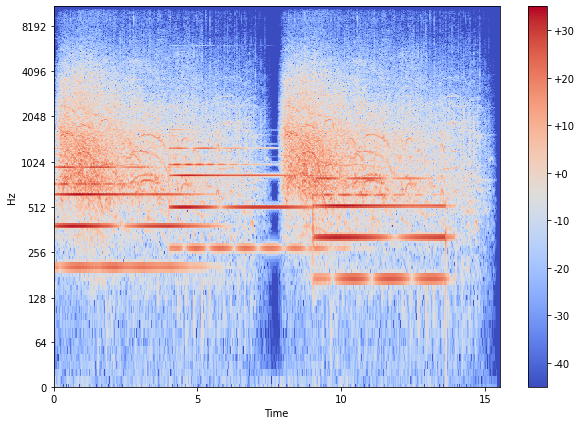

In [41]:
audio4 = "bells-tibetan.wav"
plot(audio4)

# Bell

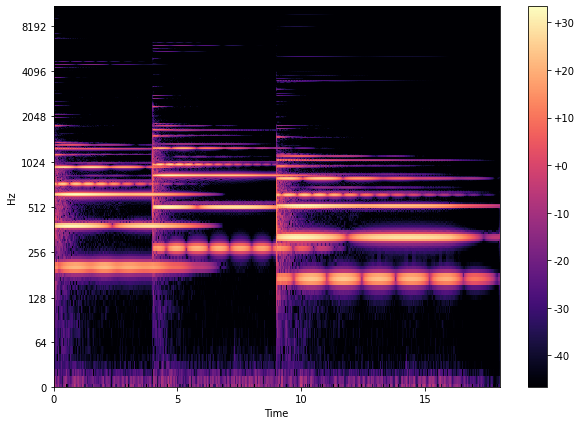

In [84]:
bell = ""
plot(bell)

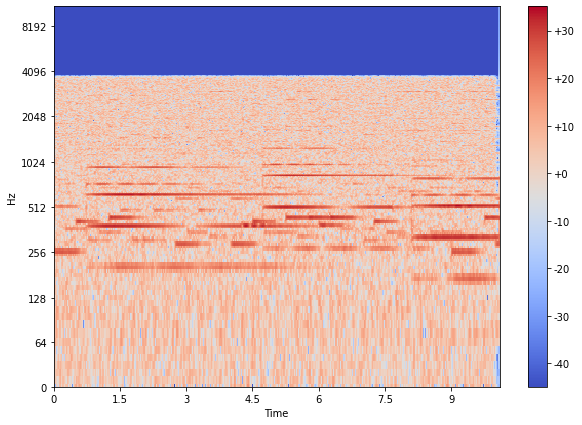

In [85]:
bell_gan = "gan_bells_noise2.wav"
plot(bell_gan)